# Develop composition analyses.

Here we guide the development of composition analyses.
The code is developed as a class. Here we document and test the development.

In [1]:
import os
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")

In [2]:
from neuro_dmt.models.bluebrain.circuit.atlas import BlueBrainCircuitAtlas
atlas_p14_12 =\
    BlueBrainCircuitAtlas(path=os.path.join(atlases_sscx_diss, "P14-12"))

In [3]:
from neuro_dmt.models.bluebrain.circuit.mock.test.mock_circuit_light import\
    circuit_composition,\
    circuit_connectivity
from neuro_dmt.models.bluebrain.circuit.mock.circuit\
    import MockBlueBrainCircuitModel
mock_circuit_model = MockBlueBrainCircuitModel(
    circuit_composition,
    circuit_connectivity)

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mtype', 'etype', 'synapse_class')


In [4]:
from neuro_dmt.models.bluebrain.circuit.adapter import BlueBrainCircuitAdapter
adapter = BlueBrainCircuitAdapter()

('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi', 'mtype', 'etype', 'synapse_class', 'postsynaptic', 'presynaptic')
('region', 'layer', 'depth', 'height', 'mesocolumn', 'hypercolumn', 'roi')


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-06 16:37:59>                                                      
Analyzing circuit MockBlueBrainCircuitModel

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-06 16:37:59>                                                      
1. Analyze Cell Density.

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-06 16:37:59>                                                      
	POST cell density report

/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/library/users/visood/sscx_dissemination/analyses/composition/__init__.py Logger
INFO@<2019-12-06 16:37:59>     

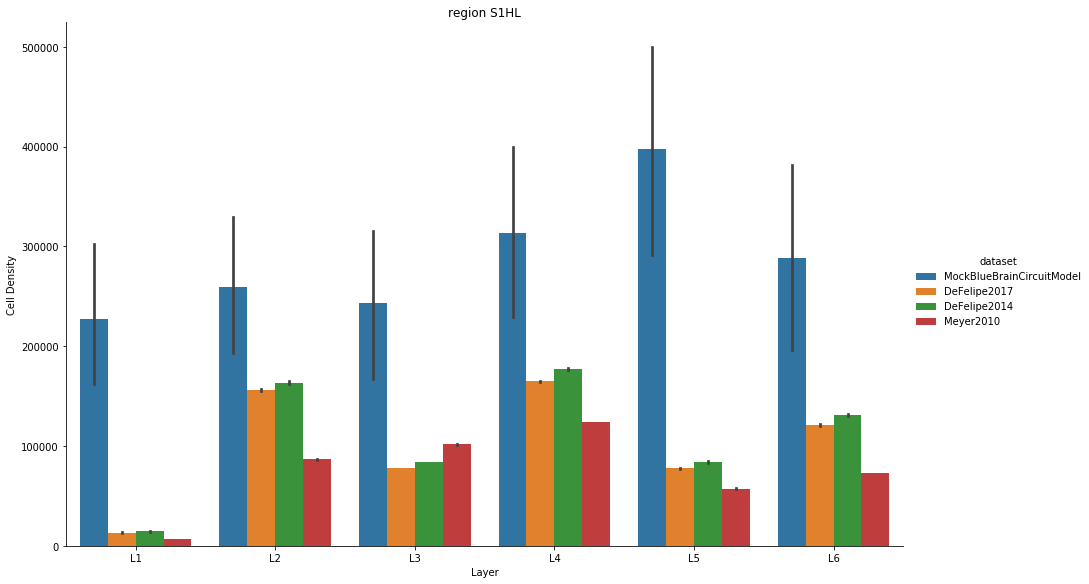

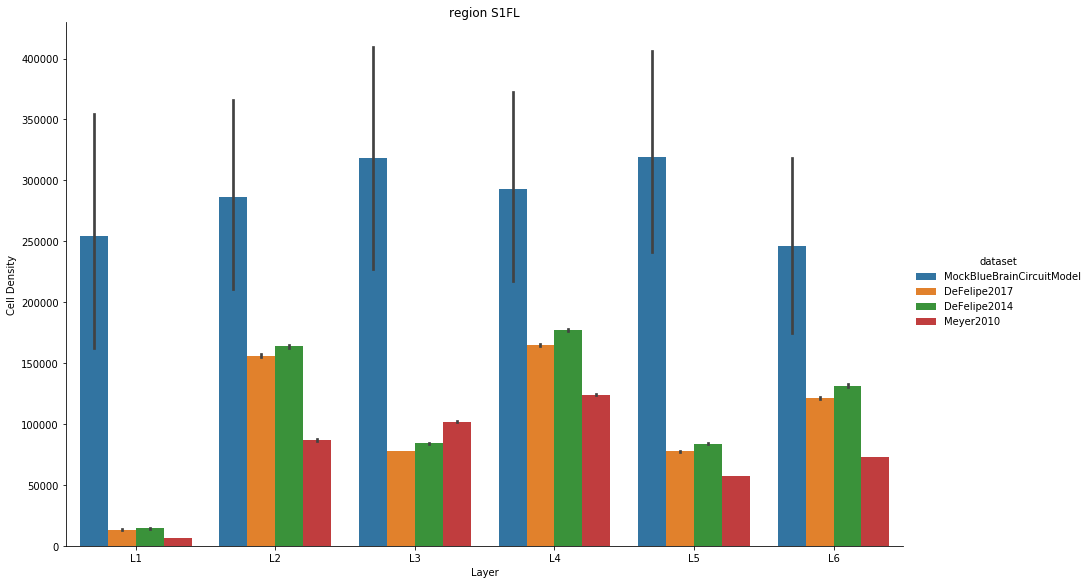

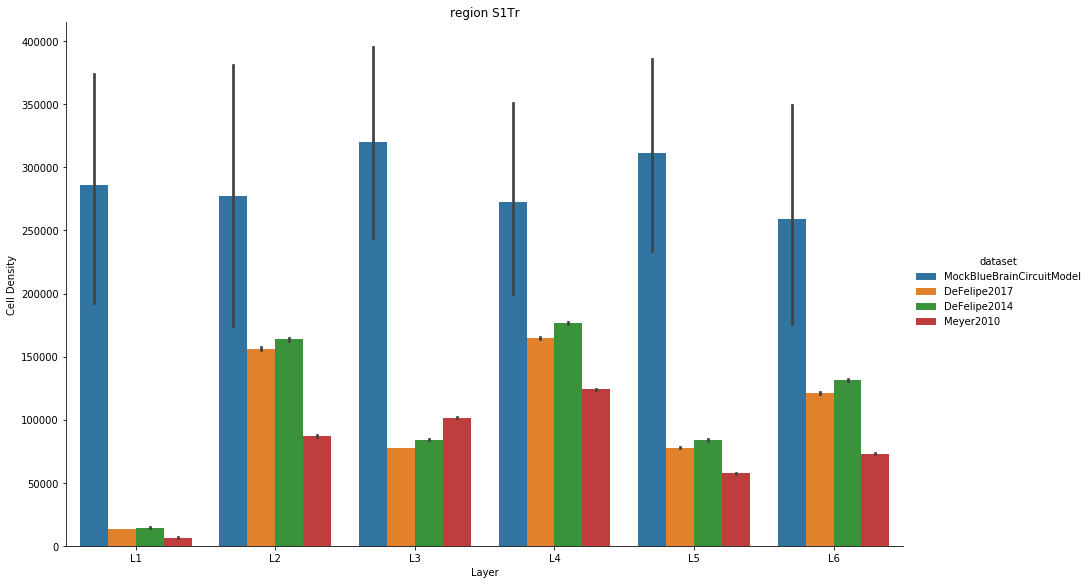

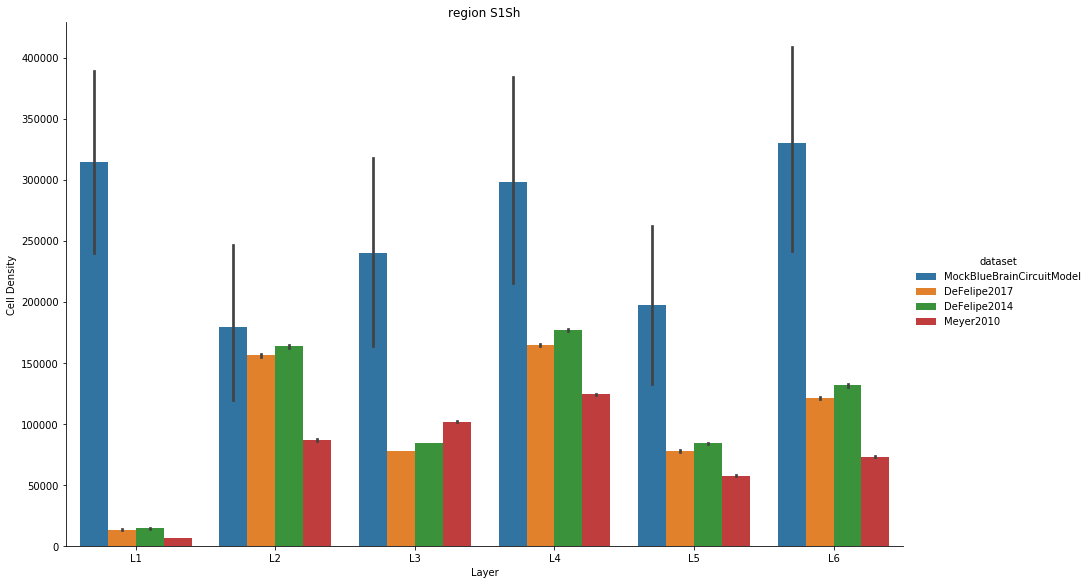

In [5]:
from neuro_dmt.data import rat
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.composition import\
    BrainCircuitCompositionAnalysis

composition_analysis =\
    BrainCircuitCompositionAnalysis(
        phenomenon="circuit_composition")
composition_analysis(mock_circuit_model, adapter)

In [6]:
import pandas as pd
from neuro_dmt.models.bluebrain.circuit.geometry import Cuboid

regions = adapter.get_brain_regions(mock_circuit_model)
layers = adapter.get_layers(mock_circuit_model)
regions_and_layers = pd.DataFrame({
    "region": [r for r in regions for _ in layers],
    "layer":  [l for _ in regions for l in layers]
})
def _get_cell_density(**spatial_query):
    position =\
        adapter.random_position(mock_circuit_model, **spatial_query)
    cuboid =\
        Cuboid(position - 25., position + 25.)
    return\
        adapter.get_cells(mock_circuit_model, roi=cuboid.bbox).shape[0] / cuboid.volume
            
    
mp = pd.concat(
    [regions_and_layers for _ in range(2)]
)
m = mp.assign(
    cell_density=lambda df: df.apply(
        lambda row: _get_cell_density(**row),
        axis=1),
    dataset=adapter.get_label(mock_circuit_model)
).set_index(
    ["dataset"] + list(mp.columns.values))

In [7]:
from neuro_dmt.data import rat
rat.defelipe2017.citation

"De Felipe et al. (2014 unpublished). 'Cell Counts per Layer', Unpublished."

In [8]:
mock_circuit_model.provenance.field_dict

{'age': 'P14',
 'animal': 'Wistar Rat',
 'authors': ['Vishal Sood'],
 'brain_region': 'SSCx',
 'label': 'MockBlueBrainCircuitModel',
 'location': '$DMTPATH/neuro_dmt/models/bluebrain/circuits/mock',
 'release_date': 'Not Applicable'}

In [9]:
from neuro_dmt.models.bluebrain.circuit.geometry import Cuboid
position =\
    adapter.random_position(mock_circuit_model, **regions_and_layers.iloc[0])
cuboid =\
    Cuboid(
        position - 25.,
        position + 25.)
adapter.get_cells(mock_circuit_model, roi=cuboid.bbox).shape[0]

25

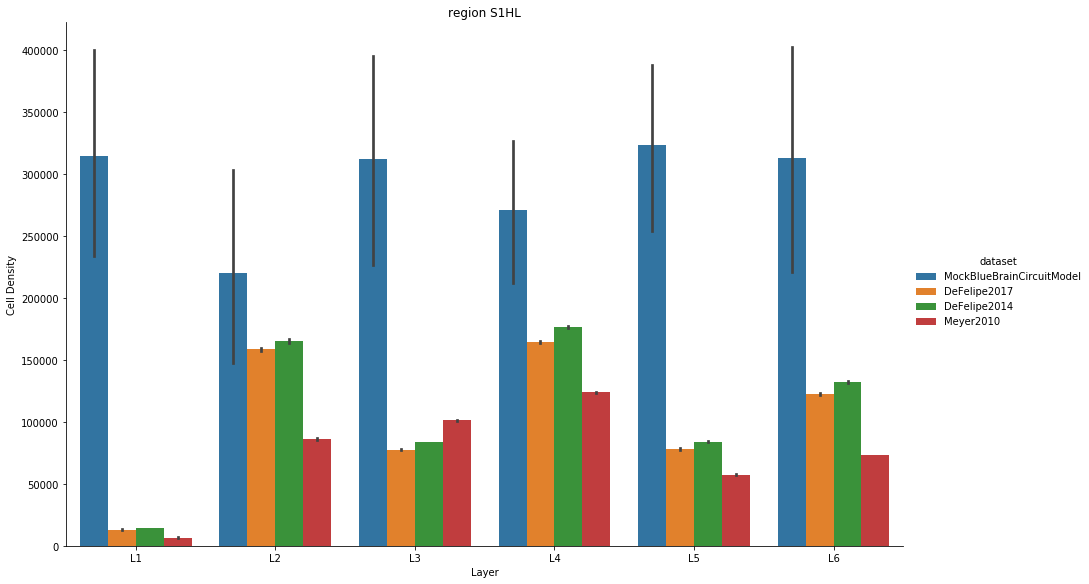

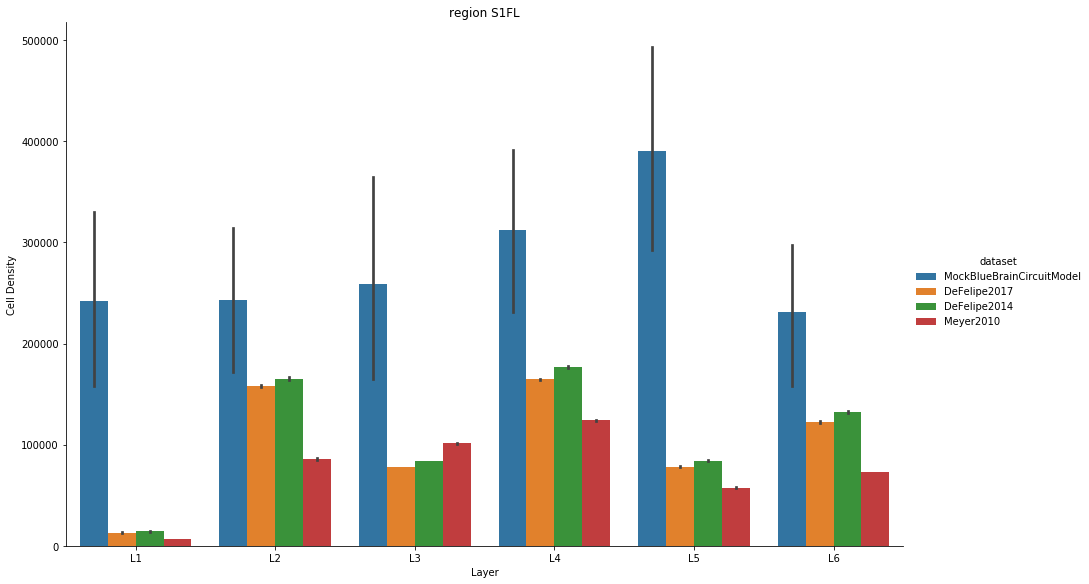

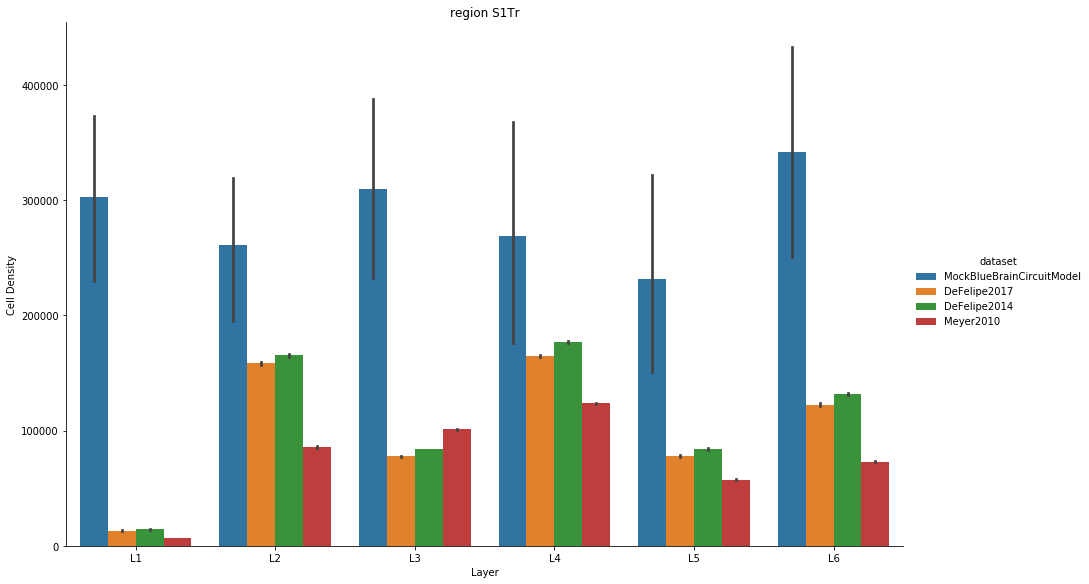

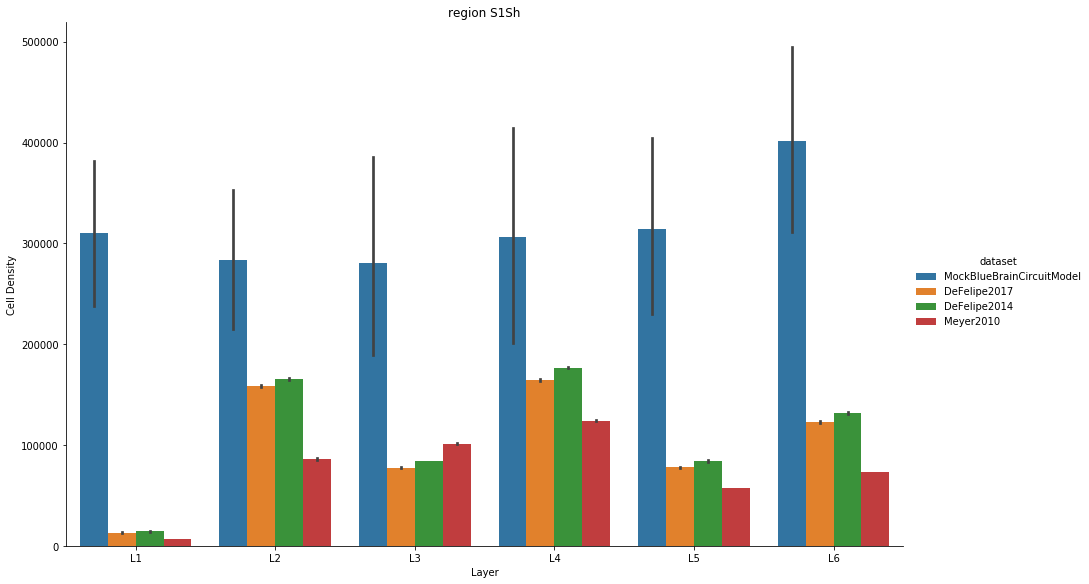

In [10]:
from neuro_dmt.analysis.reporting import CheetahReporter
reporter = CheetahReporter()
report = composition_analysis.get_cell_density_report(mock_circuit_model, adapter)

In [11]:
reporter.filled_template(report, figure_locations={})

{'author': 
         Author(
         name: Anon Y Mouse,
         affiliation: Unik N Oun,
         homepage: not-available),
 'phenomenon': 'Cell Density',
 'figures': OrderedDict([('S1HL',
               <dmt.tk.plotting.figure.Figure at 0x11e429d10>),
              ('S1FL', <dmt.tk.plotting.figure.Figure at 0x11d0c9e50>),
              ('S1Tr', <dmt.tk.plotting.figure.Figure at 0x11f182b50>),
              ('S1Sh', <dmt.tk.plotting.figure.Figure at 0x11f4fd050>)]),
 'introduction': '         A circuit model should reproduce experimentally measured cell densities.         For the mammalian cerebral cortex, the simplest measurement to validate         against is the cell density of each layer. In this analysis we use         three experimentally measured reference datasets         (see References section) to validate layer cell densities of the         circuit model MockBlueBrainCircuitModel.         ',
 'methods': '         Cell density was measured in randomly sampled boxes of     